In [1]:
import stan
import nest_asyncio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import binom, beta, gamma, poisson, norm

nest_asyncio.apply()  # required to run in notebook

# Chapter 6 Exercises

## Exercise 6.12

a. $Y|\pi \sim Bin(20,\pi)$ and $\pi ~ Beta(1,1)$ with $Y = 12$

 
```
model = """data {
    int<lower=0, upper=20> Y;
}
parameters {
    real<lower=0, upper =1> pi;
}

model {
    Y ~ binomial(20, pi);
    pi ~ beta(2,2);
}"""

posterior = stan.build(model, data={'Y':12}
fit = posterior.sample(num_chains=4, num_samples=1000)

```

b. $Y|\lambda \sim Pois(\lambda)$ and $\lambda \sim Gamma(4,2)$ with $Y=3$

 
```
model = """data {
    int<lower=0> Y;
}
parameters {
    real<lower=0> lambda;
}

model {
    Y ~ poisson(lambda);
    lambda ~ gamma(4,2);
}"""

posterior = stan.build(model, data={'Y':3}
fit = posterior.sample(num_chains=4, num_samples=1000)

```

c. $Y|\mu \sim N(\mu, 1^2)$ and $\mu \sim N(0,10^2)$ with $Y=12.2$

 
```
model = """data {
   real Y;
}
parameters {
    real mu;
}

model {
    Y ~ normal(mu,1);
    mu ~ normal(0,100);
}"""

posterior = stan.build(model, data={'Y':12.2}
fit = posterior.sample(num_chains=4, num_samples=1000)
```

## Exercise 6.13

Consider Beta binomial (in model below), with Y = 2 successes. 

In [15]:
model = """data {
    int<lower=0, upper=10> Y;
}
parameters {
    real<lower=0, upper =1> pi;
}

model {
    Y ~ binomial(10, pi);
    pi ~ beta(3,8);
}"""
 

Simulate model with 3 chains and 12000 iterations per chain, produce trace plots for the frames,  compare density plots to true posterior

In [ ]:

posterior = stan.build(model, data={'Y':2})
fit = posterior.sample(num_chains=3, num_samples=12000)

array([[<AxesSubplot:title={'center':'pi'}>,
        <AxesSubplot:title={'center':'pi'}>]], dtype=object)

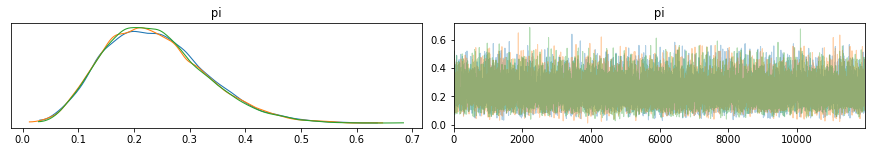

In [27]:
az.plot_trace(fit, compact = False)

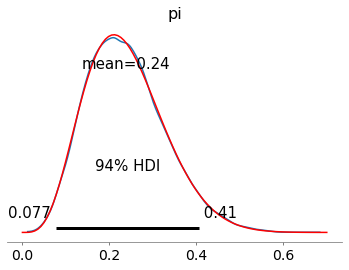

In [40]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 0.7, 100)
az.plot_posterior(fit,ax=ax)
ax.plot(x,beta.pdf(x, 3+2, 10-2+8),'r-')

## Exercise 6.14

Same as 6.13, but change prior to Beta(4,3) and observe Y=4 in n= 12 trials

In [ ]:
model = """data {
    int<lower=0, upper=12> Y;
}
parameters {
    real<lower=0, upper =1> pi;
}

model {
    Y ~ binomial(12, pi);
    pi ~ beta(4,3);
}"""


posterior = stan.build(model, data={'Y':4})
fit = posterior.sample(num_chains=3, num_samples=12000)

array([[<AxesSubplot:title={'center':'pi'}>,
        <AxesSubplot:title={'center':'pi'}>]], dtype=object)

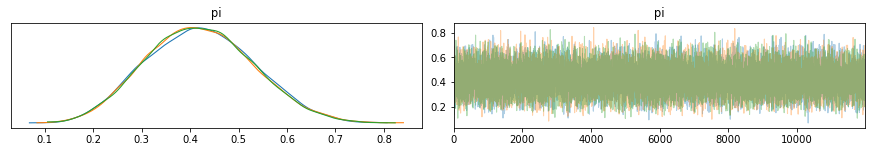

In [42]:
az.plot_trace(fit, compact = False)

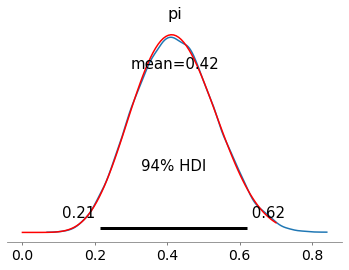

In [44]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 0.7, 100)
az.plot_posterior(fit,ax=ax)
ax.plot(x,beta.pdf(x, 4+4, 12-4+3),'r-')

## Exercise 6.15
Gamma poisson, with prior Gamma(20,5).  Observe n= 3 independant data points 0,1,0.  

In [ ]:

model = """data {
    int<lower=0> Y[3];
}
parameters {
    real<lower=0> lambda;
}

model {
    Y ~ poisson(lambda);
    lambda ~ gamma(20,5);
}"""

posterior = stan.build(model, data={'Y':[0,1,0]})
fit = posterior.sample(num_chains=4, num_samples=10000)


array([[<AxesSubplot:title={'center':'lambda'}>,
        <AxesSubplot:title={'center':'lambda'}>]], dtype=object)

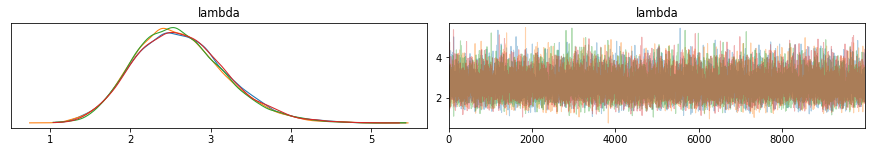

In [53]:
az.plot_trace(fit, compact = False)

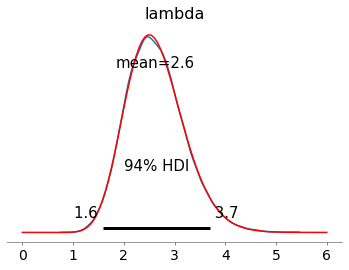

In [50]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 6, 100)
az.plot_posterior(fit,ax=ax)
ax.plot(x,gamma.pdf(x, 21, scale = (1/8)),'r-')

## Excercise 6.16 
As above but prior ~ Gamma(5,5)

In [ ]:
model = """data {
    int<lower=0> Y[3];
}
parameters {
    real<lower=0> lambda;
}

model {
    Y ~ poisson(lambda);
    lambda ~ gamma(5,5);
}"""

posterior = stan.build(model, data={'Y':[0,1,0]})
fit = posterior.sample(num_chains=4, num_samples=10000)

array([[<AxesSubplot:title={'center':'lambda'}>,
        <AxesSubplot:title={'center':'lambda'}>]], dtype=object)

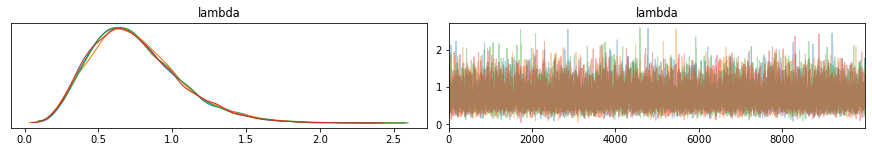

In [3]:
az.plot_trace(fit, compact = False)

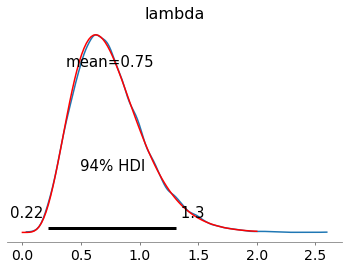

In [6]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 2, 100)
az.plot_posterior(fit,ax=ax)
ax.plot(x,gamma.pdf(x, 6, scale = (1/8)),'r-')

## Exercise 6.17  
Now we have Normal-Normal model with $Y_i|\mu \sim N(\mu, 1.3^2)$ and $\mu \sim N(10,1.2^2)$.  We observe n=4 observations (7.1,8.9,8.4,8.6)

In [ ]:
model = """data {
   real Y[4];
}
parameters {
    real mu;
}

model {
    Y ~ normal(mu,1.3);
    mu ~ normal(10,1.2);
}"""

posterior = stan.build(model, data={'Y':[7.1, 8.9, 8.4, 8.6]})
fit = posterior.sample(num_chains=4, num_samples=10000)

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

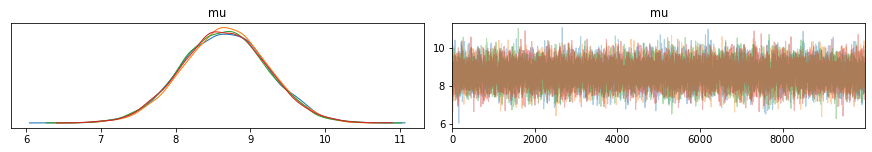

In [8]:
az.plot_trace(fit, compact = False)

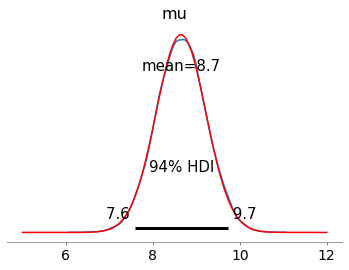

In [10]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(5, 12, 100)
az.plot_posterior(fit,ax=ax)
data_mean = np.mean([7.1, 8.9, 8.4, 8.6])
post_mean = (data_mean*1.2*1.2*4 + 10*1.3*1.3)/(1.2*1.2*4 + 1.3*1.3)
post_var = 1.2**2*1.3**2/(1.2*1.2*4 + 1.3*1.3)
ax.plot(x,norm.pdf(x, post_mean, np.sqrt(post_var)),'r-')

## Exercise 6.18  
Now we have Normal-Normal model with $Y_i|\mu \sim N(\mu, 8^2)$ and $\mu \sim N(-14,2^2)$.  We observe n=5 observations (-10.1,5.5,0.1,-1.4,11.5)

In [11]:
data =[ -10.1,5.5,0.1,-1.4,11.5]

model = """data {
   real Y[5];
}
parameters {
    real mu;
}

model {
    Y ~ normal(mu,8);
    mu ~ normal(-14,2);
}"""

posterior = stan.build(model, data={'Y':data})
fit = posterior.sample(num_chains=4, num_samples=10000)

Building...

In file included from /Users/ronaldlegere/Library/Caches/httpstan/4.6.1/models/4sk52bs3/model_4sk52bs3.cpp:2:
In file included from /Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused vari


Building: 17.4s, done.Messages from stanc:
Warning in '/var/folders/wp/lklypdrn6d30j7shz2tybp200000gn/T/httpstan_cseudptg/model_4sk52bs3.stan', line 10, column 17: Argument -14 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (11000/44000)
Sampling:  50% (22000/44000)
Sampling:  75% (33000/44000)
Sampling: 100% (44000/44000)
Sampling: 100% (44000/44000), done.
Messages received during sampling:
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

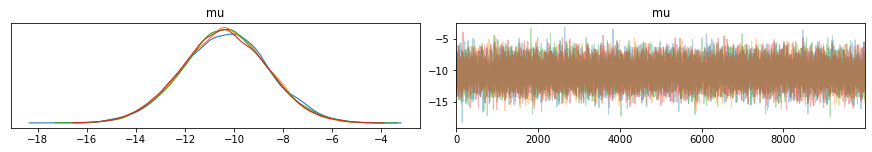

In [12]:
az.plot_trace(fit, compact = False)

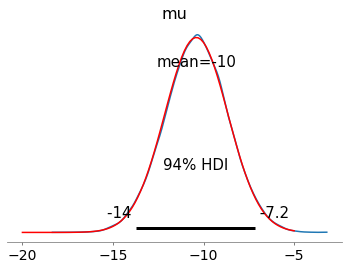

In [14]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-20, -5, 100)
az.plot_posterior(fit,ax=ax)
data_mean = np.mean(data)
post_mean = (data_mean*5*2**2 - 14*8**2)/(5*2**2+ 8**2)
post_var =  2**2*8**2/(5*2**2+ 8**2)
ax.plot(x,norm.pdf(x, post_mean, np.sqrt(post_var)),'r-')